In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read dataset
data = pd.read_csv("anonymized_data.csv")
data.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [3]:
#3 dimensional data
data = data[['VALM', 'GWID', 'LKKS']]
data.head()

,VALM,GWID,LKKS
0,1.019576,8.508296,-2.209663
1,6.649376,6.692765,0.851793
2,6.985462,7.577283,1.376085
3,0.579422,6.798810,0.270571
4,0.234729,7.239925,-0.013973


In [4]:
#Standardize Data
scaler = StandardScaler()
data = scaler.fit_transform(data)

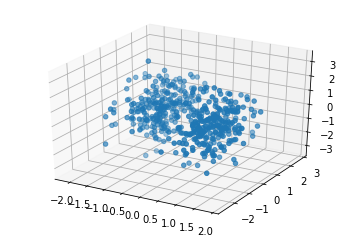

In [6]:
#Plot 3-Dimensional data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2])

In [7]:
#Intialize parameters
n_inputs = 3
n_hidden = 2
n_outputs = 3

In [8]:
#Create Graph
inputs = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(inputs, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

In [9]:
loss = tf.reduce_mean(tf.square(outputs - inputs))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

In [10]:
#Run tensorflow session

init = tf.global_variables_initializer()
iterations = 500

with tf.Session() as sess:
    sess.run(init)
    for iteration in range(iterations):
        sess.run(train, feed_dict={inputs:data})
    pca_dimensions = sess.run(hidden, feed_dict={inputs:data})
    

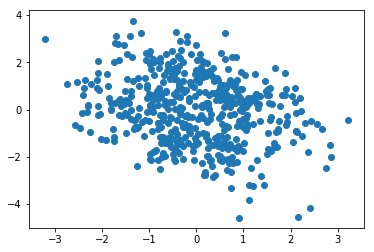

In [11]:
#Plot 2-Dimensional data
plt.scatter(pca_dimensions[:,0], pca_dimensions[:,1])